In [ ]:
from utils import img_util
from utils import hed_util
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Grab path to current working directory
CWD_PATH = os.getcwd()
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')

 
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'model'
HED_NAME = 'HED'
# Grab path to current working directory
CWD_PATH = os.getcwd()
HED_PROTOTEXT_PATH = os.path.join(CWD_PATH,MODEL_NAME,HED_NAME,'deploy.prototxt')
HED_CAFFEE_MODEL_PATH = os.path.join(CWD_PATH,MODEL_NAME,HED_NAME,'hed_pretrained_bsds.caffemodel')
net = hed_util.load_dnn(HED_PROTOTEXT_PATH,HED_CAFFEE_MODEL_PATH)

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 120, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),dtype=np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),dtype=np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5, 5), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def tophat(image):
    kernel = np.ones((5, 5), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_TOPHAT, rectKernel)

def adjust_gamma(image, gamma=1.2):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

def sharpen(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(image, -1, kernel)   

def imshow(image, title='title'):
    plt.title(title)
    plt.imshow(image)
    plt.show() 


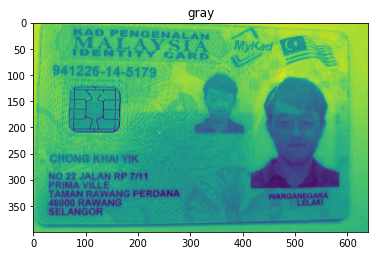

In [137]:
img_file = os.path.join(TEST_IMAGE_PATH,'mxw1nqllwlqvt5wry7yev6mjwp0hljjvsyhhnldq67_front.jpeg')
img = cv2.imread(img_file, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imshow(gray, 'gray')

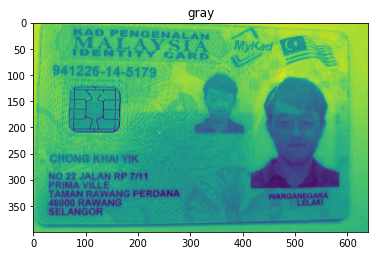

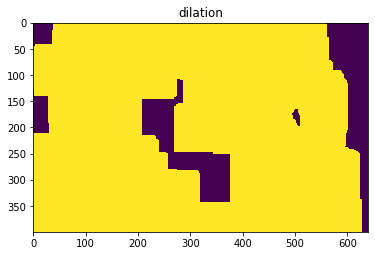

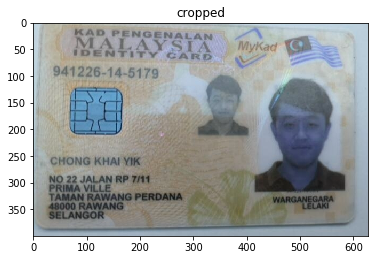

In [138]:
imshow(gray,'gray')
blur = cv2.medianBlur(gray,7)
#cropped = cv2.bilateralFilter(card, 9, 60,60)
thresh1 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11, 9)
#ret, thresh1 = cv2.threshold(thresh1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) 
#ret, t = cv2.threshold(cropped, 150, 255, cv2.THRESH_BINARY) 

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17)) 
im2 = gray.copy()   
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 5) 
imshow(dilation,'dilation')
# Finding contours 
cnts = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
boxes = []
cnt = None
max_area = x = y = w = h = 0
i=0
v=0
for c in cnts:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    v+=1
    if area > max_area:
        #print('{} > {}'.format(area, max_area))
        #cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.drawContours(img, [c], 0, (0,  255, 0), 3)
        cropped = img[y:y + h, x:x + w] 
        max_area = area
        cnt = c    
        boxes.append(c)
        i+=1

imshow(cropped,'cropped')